# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Estacio, Damien Marius\
_Student No._: 202113663\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Damien Marius Miana Estacio

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

Diameter: 4
Density: 0.4
Average Degree: 3.6


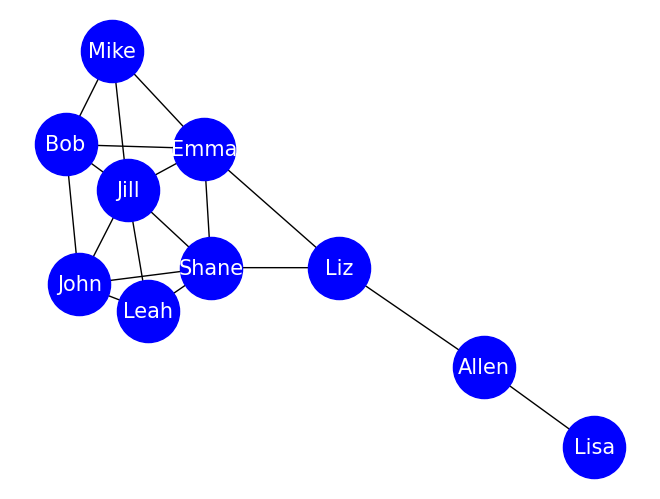

In [2]:
import networkx as nx
import numpy as np
%matplotlib inline

N = nx.Graph()
nodes = ["Bob", "John", "Mike", "Jill", "Leah", "Emma", "Shane", "Liz", "Allen", "Lisa"]
edges = [("Bob", "Mike"), ("Bob", "Emma"), ("Bob", "Jill"), ("Bob", "John"), 
         ("John", "Jill"), ("John", "Shane"), ("John", "Leah"), 
         ("Mike", "Emma"), ("Mike", "Jill"), 
         ("Jill", "Emma"), ("Jill", "Shane"), ("Jill", "Leah"), 
         ("Leah", "Shane"), 
         ("Emma", "Liz"), ("Emma", "Shane"), 
         ("Shane", "Liz"), 
         ("Liz", "Allen"), 
         ("Allen", "Lisa")]

N.add_nodes_from(nodes)
N.add_edges_from(edges)
nx.draw(N, with_labels = True, node_color = 'blue', node_size = 2000, font_color = 'white', font_size = 15)
print("Diameter: " + str(nx.diameter(N)))
print("Density: " + str(nx.density(N)))
degree_sum = 0
degree_value = 0
for n in nx.degree_histogram(N):
    degree_sum += n*degree_value
    degree_value += 1
print("Average Degree: " + str(degree_sum/nx.number_of_nodes(N)))

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [3]:
import pandas as pd

degree_centrality = nx.degree_centrality(N)
betweenness_centrality = nx.betweenness_centrality(N)
closeness_centrality = nx.closeness_centrality(N)

c = {"Name": nodes, "Degree Centrality": degree_centrality.values(), "Betweenness Centrality": betweenness_centrality.values(), "Closeness Centrality": closeness_centrality.values()}
centrality = pd.DataFrame(data = c)

print(centrality)

    Name  Degree Centrality  Betweenness Centrality  Closeness Centrality
0    Bob           0.444444                0.023148              0.529412
1   John           0.444444                0.023148              0.529412
2   Mike           0.333333                0.000000              0.500000
3   Jill           0.666667                0.101852              0.600000
4   Leah           0.333333                0.000000              0.500000
5   Emma           0.555556                0.231481              0.642857
6  Shane           0.555556                0.231481              0.642857
7    Liz           0.333333                0.388889              0.600000
8  Allen           0.222222                0.222222              0.428571
9   Lisa           0.111111                0.000000              0.310345


#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.